# Exercise Sheet 3: Multilayer Perceptrons and Backpropagation Algorithm

<br>Machine Intelligence 1 

<br>WS 2017/18, Obermayer/Augustin 

<br>due: 2017-11-08

<br>Group: C4N2

<br>Used Python version 3.5.2 (https://www.continuum.io/downloads, http://ipython.org/install.html)

In [1]:
import sys
print(sys.version)

3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## Exercise H3.2: MLP Regression

In [2]:
#Necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [3]:
#Reading data
regression_data = np.loadtxt('./RegressionData.txt')
N = regression_data.shape[0]
X = regression_data[:, 0].reshape(1, regression_data.shape[0])
Y = regression_data[:, 1].reshape(1, regression_data.shape[0])

#Initialization
def init_params():
    W1 = np.random.rand(1, 3) - 0.5
    bias1 = np.random.rand(3, 1) - 0.5
    W2 = np.random.rand(3,1) - 0.5
    bias2 = np.random.rand(1) - 0.5
    print (bias2)
    std_deviation = 0.25
    return W1, bias1, W2, bias2, std_deviation

#1. Forward propagation
def forward_propagation(W1, W2, bias1, bias2, X):
    hidden_input = W1.T.dot(X) - bias1
    hidden_output = np.tanh(hidden_input)
    output = W2.T.dot(hidden_output) - bias2
    return hidden_output, output

#2. Output error
def output_error(Y_estimate, Y):
    return 0.5*(np.sum((Y_estimate - Y)**2))

#3. Back propagation and 4. Weight Update
def bp():
    W1, bias1, W2, bias2, std_deviation = init_params()
    print (bias2)
    t = 0
    Errors = []
    Error_tmp = 0
    learning_rate = 0.5
    Y_estimate = 0
    while(t < 3000):
        hidden_output, Y_estimate = forward_propagation(W1, W2, bias1, bias2, X)
        if(len(Errors) == 0):
            Error_tmp = output_error(Y_estimate, Y)
        else:
            tmp_var = output_error(Y_estimate, Y)
            if(abs(Error_tmp - tmp_var) / tmp_var < 10e-5):
                break;
            else:
                Error_tmp = tmp_var
        Errors.append(Error_tmp)
        hidden_derivatives = - hidden_output**2 + 1
        error_output_layer = Y_estimate - Y
        error_hidden_layer = hidden_derivatives * W2.dot(error_output_layer)
        derivative_input_layer = - X.dot(error_hidden_layer.T) / (N * 1.0)
        derivative_hidden_layer = - hidden_output.dot(error_output_layer.T) / (N * 1.0)
        W1 = W1 + derivative_input_layer * learning_rate
        W2 = W2 + derivative_hidden_layer * learning_rate
        bias1 = bias1 + np.sum(error_hidden_layer, axis=1).reshape(3,1) * learning_rate/(N*1.0)
        bias2 = bias2 + np.sum(error_output_layer)* learning_rate/(N*1.0)
        t = t + 1
    plt.plot(np.arange(0, len(Errors)), Errors)
    plt.show()
    return W1, bias1, W2, bias2

#Plotting the output of hidden units for all inputs
def plot_hidden_output():
    hidden_layer_output, y_pred = forward_propagation(W1, W2, bias1, bias2, X)
    plt.scatter(X.T, hidden_layer_output[0, :].T, color='r', label="w: " + str(W1[:, 0]) + " theta: " + str(bias1[0]))
    plt.scatter(X.T, hidden_layer_output[1, :].T, color='g', label="w: " + str(W1[:, 1]) + " theta: " + str(bias1[1]))
    plt.scatter(X.T, hidden_layer_output[2, :].T, color='b', label="w: " + str(W1[:, 2]) + " theta: " + str(bias1[2]))
    plt.legend()
    plt.show()

#Plotting the output values over the input space
def plot_prediction():
    hidden_layer_output, y_pred = forward_propagation(W1, W2, bias1, bias2, X)
    plt.scatter(X.T, Y.T, color='r', marker="o", label="train")
    plt.scatter(X.T, y_pred.T, color='b', marker="x", alpha= 0.5, label="pred")
    plt.legend()
    plt.show()

### a)

[-0.03715391]
[-0.03715391]


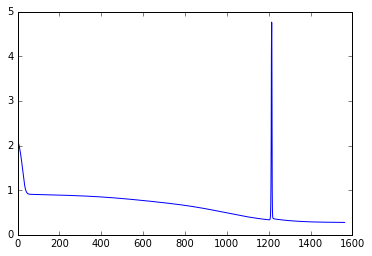

In [4]:
W1, bias1, W2, bias2 = bp()

### b)

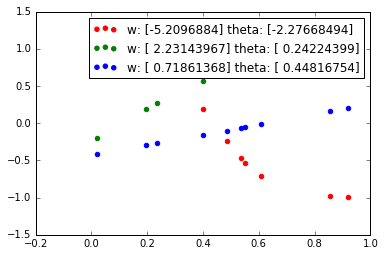

In [5]:
plot_hidden_output()

### c)

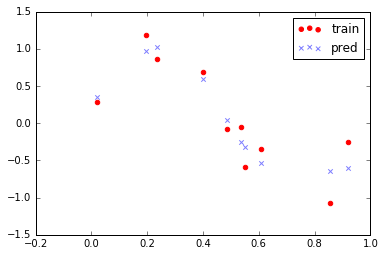

In [6]:
plot_prediction()

### d)

First initial conditions
[ 0.3381478]
[ 0.3381478]


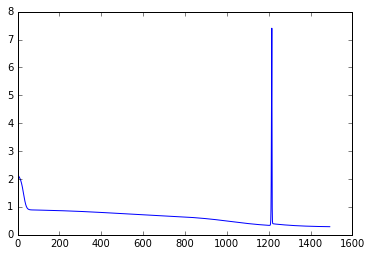

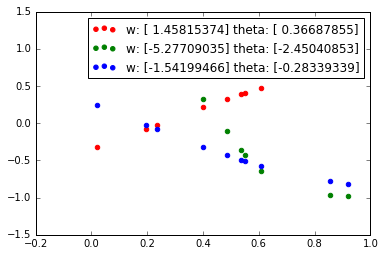

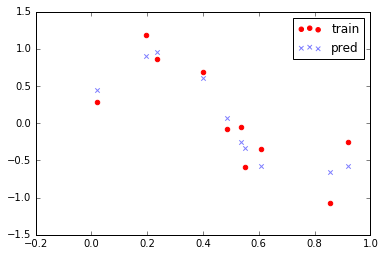

Different random initial conditions
[-0.37201534]
[-0.37201534]


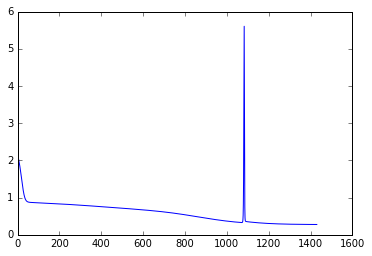

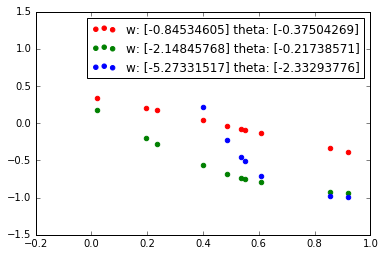

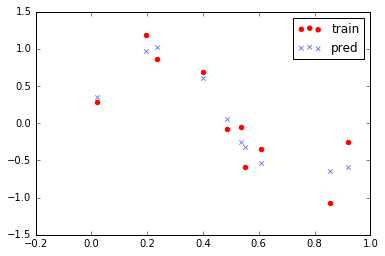

In [7]:
print ('First initial conditions')
W1, bias1, W2, bias2 = bp()
plot_hidden_output()
plot_prediction()

print ('Different random initial conditions')
W1, bias1, W2, bias2 = bp()
plot_hidden_output()
plot_prediction()

Although the overall prediction of y is very similar in both MLPs, the output functions of
the hidden neurons are completely different. This is caused by the random initialization of
the weights: The weights are the starting point for gradient descent, which based on it finds
different local optima.

### e)

We know that the noise is Gaussian distributed, which makes big outliners very unlikely.
Furthermore, the y T values vary in [− 1, 1 ] , thus quite strongly. Therefore, we want a cost
functions that is strongly affected outliners.
